In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import time
import random
import pandas as pd
from array import *

from scipy import signal
from scipy import misc
from scipy.spatial import distance
from skimage import measure
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

In [2]:
def random_color():
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

def show_image(img):
    figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [3]:
img = []
img4 = []
img_orig = []

### Load image

##### Insert white border around image

In [4]:
img = cv2.imread("mapout.png", cv2.IMREAD_GRAYSCALE);
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB);
img = backtorgb.dot([0.33,0.33,0.33])

(my,mx)=img.shape
img[0,:]=255
img[:,0]=255
img[my-1,:]=255
img[:,mx-1]=255

img_orig = img.copy()
#show_image(image_data)

In [5]:
image_data = np.stack((backtorgb[:,:,0],backtorgb[:,:,1],backtorgb[:,:,2]), axis=2)
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst2 = cv2.cornerHarris(gray,5,3,0.04)

In [6]:
ret, dst = cv2.threshold(dst2,0.025*dst2.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#image_data[dst>0.1*dst.max()]=[0,0,255]
#show_image(image_data)

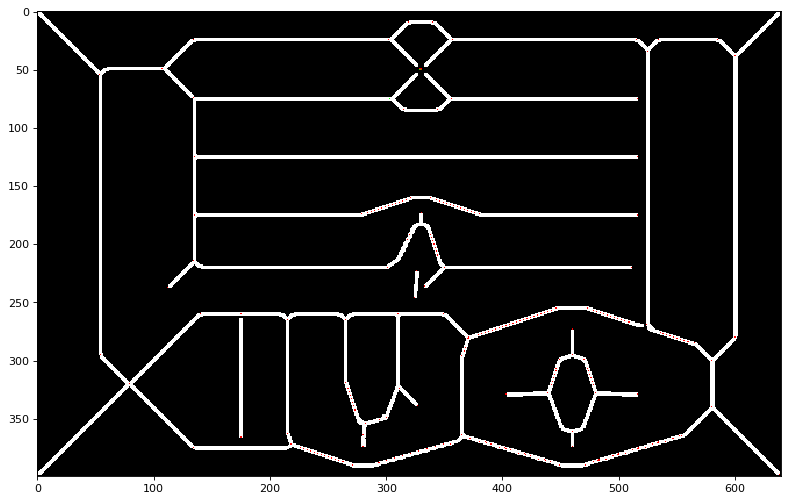

In [7]:
def findpointsnear(x,y,radius):
    lcorner = [list([int(i[0]),int(i[1])]) for i in corners ]
    radius = radius ** 2
    proximates = []
    prox_index = 0
    for [x0,y0] in lcorner:
        if ((x0-x)**2+(y0-y)**2)<radius:
            proximates.append(prox_index)
        prox_index = prox_index + 1
    return proximates

lcorner = [list([int(i[0]),int(i[1])]) for i in corners ]
for [x,y] in lcorner:
    image_data[y,x]=(255,0,0)


p = lcorner[findpointsnear(310,75,10)[0]]
image_data[p[1],p[0]]=(0,255,0)
p = lcorner[findpointsnear(320,60,14)[0]]
image_data[p[1],p[0]]=(0,255,0)

show_image(image_data)

In [8]:
def linelength(img,p1,p2):
    if p1==p2:
        return -1
    
    (x0,y0) = p1
    (x1,y1) = p2
    
    sx = 1
    sy = 1
    
    if x0>x1:
        sx = -1
    if y0>y1:
        sy = -1
        
    dx =  abs(x1-x0)       
    dy = -abs(y1-y0)
    
    err = dx+dy
    
    ll=0
    lp=0
    while True:
        lp = lp + 1
        if img[y0,x0]!=0:
            ll = ll +1
        
        if (abs(x0-x1)<2) and (abs(y0-y1)<2):
            if lp!=0:
                return int(100*ll/lp)
            else:
                return -1
            
        e2 = 2*err
        
        if (e2 >= dy):
            err += dy 
            x0 += sx
        
        if (e2 <= dx):
            err += dx
            y0 += sy

In [9]:
lcorner = [list([int(i[0]),int(i[1])]) for i in corners ]
lcornerleft = [list([int(i[0]),int(i[1])]) for i in corners ]

In [10]:
lines = []
for i in lcorner:
    [x,y] = i
    p1 = (x,y)
    lcornerleft.remove(i)
    
    for j in lcornerleft:
        [x,y] = j
        p2 = (x,y)
        pcnt = linelength(backtorgb[:,:,0],p1,p2)
        if pcnt > 90:
            lines.append([p1,p2])


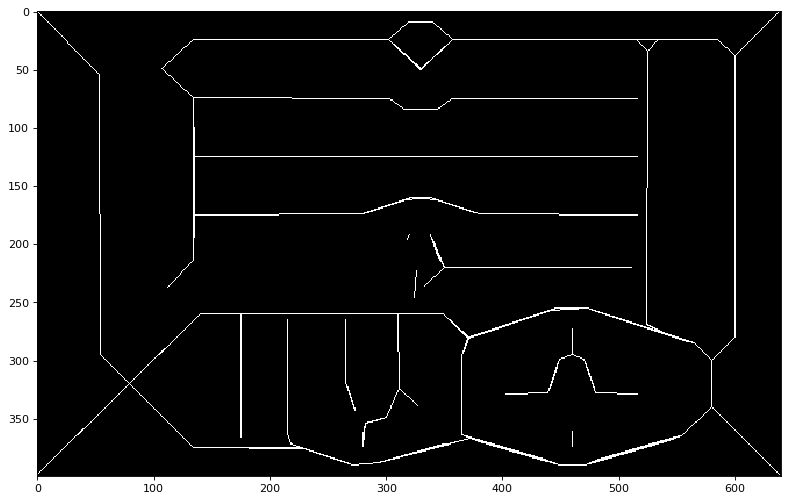

In [11]:
blank = np.zeros_like(image_data)
for i in lines:
    [p1,p2] = i
    
    cv2.line(blank,p1,p2,(255,255,255),1)
show_image(blank)